<a href="https://colab.research.google.com/github/rajesh0305/Module3-Natural-language-processing-/blob/main/Implementation_of_K_Fold_Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# !pip install scikit-learn==0.17
!pip install --upgrade scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
#from sklearn import cross_validation
from sklearn import model_selection

In [5]:
df = pd.read_csv('/content/drive/MyDrive/demo_data_for_knn/3.concertriccir2.csv')
df.head()

,7.003345706103683010e-01,-2.470675778972781789e-01,0.000000000000000000e+00
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0


In [4]:
#part I
#==========data processing ============

#define column names
names =['x','y','class']

#loading traning data
df = pd.read_csv('/content/drive/MyDrive/demo_data_for_knn/3.concertriccir2.csv',header=None,names =names )
print(df.head())

#create design matrix x and target vector y
x = np.array(df.iloc[:,0:4])#end index is exclusive
y = np.array(df['class'])#showing you two ways of indexing a pandas df


          x         y  class
0  0.700335 -0.247068    0.0
1 -3.950019  2.740080    1.0
2  0.150222 -2.157638    1.0
3 -1.672050 -0.941519    1.0
4  2.560483 -1.846577    1.0


**Smple Cross Validation**

In [9]:
#split the data into train and test part
x_1,x_test,y_1,y_test = model_selection.train_test_split(x,y,test_size = 0.3,random_state=0)

#split the train data set into cross validation train and cross validation
x_train,x_cv,y_train,y_cv = model_selection.train_test_split(x_1,y_1,test_size = 0.3,random_state = 0)


for i in range (1,30,2):
  #initialize learning model(k=30)
  knn = KNeighborsClassifier(n_neighbors=i)

  #fitting the model on crossvalidation train
  knn.fit(x_train,y_train)

  #predict the response on the crossvalidation  train
  pred = knn.predict(x_cv)

  #evaluate cv accuracy
  acc = accuracy_score(y_cv,pred,normalize = True)*float(100)
  print('\nCV accuracy for k = %d is %d%%'% (i,acc))


knn = KNeighborsClassifier(1)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
acc = accuracy_score(y_test,pred,normalize = True)*float(100)
print('\n***test accuracy for k=1 is %d%%'%(acc))


knn = KNeighborsClassifier(3)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
acc = accuracy_score(y_test,pred,normalize= True)*float(100)
print('\n**test accuracy for k = 3 is %d%%'%(acc))



CV accuracy for k = 1 is 100%

CV accuracy for k = 3 is 100%

CV accuracy for k = 5 is 100%

CV accuracy for k = 7 is 100%

CV accuracy for k = 9 is 100%

CV accuracy for k = 11 is 98%

CV accuracy for k = 13 is 94%

CV accuracy for k = 15 is 94%

CV accuracy for k = 17 is 91%

CV accuracy for k = 19 is 90%

CV accuracy for k = 21 is 86%

CV accuracy for k = 23 is 85%

CV accuracy for k = 25 is 83%

CV accuracy for k = 27 is 80%

CV accuracy for k = 29 is 77%

***test accuracy for k=1 is 99%

**test accuracy for k = 3 is 99%


**10 Fold Cross Validation**


 The optimal number of neighbors is 1.
the misclassification error for each k values is : [0.    0.    0.004 0.012 0.029 0.049 0.054 0.078 0.09  0.103 0.136 0.16
 0.184 0.238 0.238 0.254 0.282 0.29  0.29  0.29  0.319 0.326 0.347 0.355
 0.372]


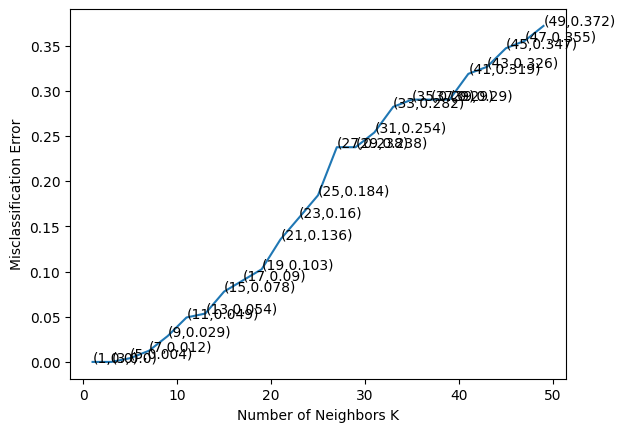

In [12]:
#creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x%2 !=0, myList))

#empty list that will hold cv score
cv_scores = []

#perform 10-fold cross validation
for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn,x_train, y_train, cv = 10,scoring = 'accuracy')
  cv_scores.append(scores.mean())
#changing to misclassification error
mse = [1-x for x in cv_scores]

#determinig best k
optimal_k = neighbors[mse.index(min(mse))]
print('\n The optimal number of neighbors is %d.'% optimal_k)



#plot misclassification error vs k
plt.plot(neighbors,mse)

for xy in zip(neighbors , np.round(mse,3)):
  plt.annotate('(%s,%s)' %xy, xy = xy,textcoords = 'data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')

print("the misclassification error for each k values is :",np.round(mse,3))


In [14]:
#=========KNN with k = optimal_k============
#instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

#fitting the model
knn_optimal.fit(x_train,y_train)

#predict the response
pred = knn_optimal.predict(x_test)

#evaluate accuracy
acc = accuracy_score(y_test,pred)*float(100)
print('\n The accuracy of the Knn classifier for k = %d is %f%%'%(optimal_k,acc))



 The accuracy of the Knn classifier for k = 1 is 99.333333%
